<a href="https://colab.research.google.com/github/Balogunolalere/jina-examples/blob/main/Docarray_Car_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U jina

     |████████████████████████████████| 243 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 10.9 MB 46.2 MB/s 
     |████████████████████████████████| 621 kB 28.7 MB/s 
     |████████████████████████████████| 3.8 MB 37.5 MB/s 
     |████████████████████████████████| 229 kB 51.2 MB/s 
     |████████████████████████████████| 111 kB 50.8 MB/s 
     |████████████████████████████████| 1.8 MB 43.2 MB/s 
     |████████████████████████████████| 1.0 MB 38.2 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 146 kB 47.6 MB/s 
     |████████████████████████████████| 3.6 MB 42.5 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 27.8 MB/s 
     |████████████████████████████████| 51 kB 5.9 MB/s 
     |████████████████████████████████| 144 kB 44.8 MB/s 
     |████████████████████████████████| 271 kB 57.1 MB/s 
     |██████████████

In [1]:
!pip install docarray

In [3]:
!pip install kaggle


In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yamaerenay/100-images-of-top-50-car-brands

 38% 18.0M/47.2M [00:00<00:00, 183MB/s]
100% 47.2M/47.2M [00:00<00:00, 248MB/s]


In [5]:
! unzip 100-images-of-top-50-car-brands.zip


Archive:  100-images-of-top-50-car-brands.zip
  inflating: companies.csv           
  inflating: imgs_zip/imgs/Acura/Acura_000.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_001.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_002.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_003.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_004.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_005.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_006.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_007.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_008.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_009.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_010.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_011.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_012.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_013.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_014.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_015.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_016.jpg  
  inflating: imgs_zip/imgs/Acura/Acura_017.jpg  
  inflating: imgs_zip/imgs/Acura/A

In [6]:
from docarray import Document, DocumentArray

In [9]:
docs = DocumentArray.from_files('/content/imgs_zip/*/*/*.jpg')

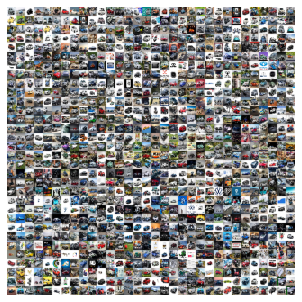

In [10]:
docs.plot_image_sprites()

In [11]:
len(docs)

4597

In [13]:
# Convert to tensor, normalize so they're all similar enough
def preproc(d: Document):
    return (d.load_uri_to_image_tensor()  # load
             .set_image_tensor_shape((80, 60))  # ensure all images right size (dataset image size _should_ be (80, 60))
             .set_image_tensor_normalization()  # normalize color 
             .set_image_tensor_channel_axis(-1, 0))  # switch color axis for the PyTorch model later

In [14]:
docs.apply(preproc)

╭─────────────────────── Documents Summary ───────────────────────╮
│                                                                 │
│   Length                 4597                                   │
│   Homogenous Documents   True                                   │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri')   │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       4597             False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   4597             False             │
│   uri         ('str',)       4597             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [15]:
# Use GPU if available
import torch
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [16]:
import torchvision
model = torchvision.models.resnet50(pretrained=True)  # load ResNet50

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [17]:
docs.embed(model, device=device)

╭───────────────────────────── Documents Summary ──────────────────────────────╮
│                                                                              │
│   Length                 4597                                                │
│   Homogenous Documents   True                                                │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    4597             False             │
│   id          ('str',)       4597             False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   4597             False             │
│   uri         ('str',)       4597             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [30]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8e26507483c2ed7525ee4db2dac0153f91f7628bdbf2c501eaf2d1110c85f751
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [34]:
!python -m wget -o query.jpg https://carsales.pxcrush.net/carsales//cars/dealer/1pox9ec0oq5cw0nem02moru6n.jpg?pxc_method=gravityfill&pxc_bgtype=self&pxc_size=720,480 


Saved under query.jpg


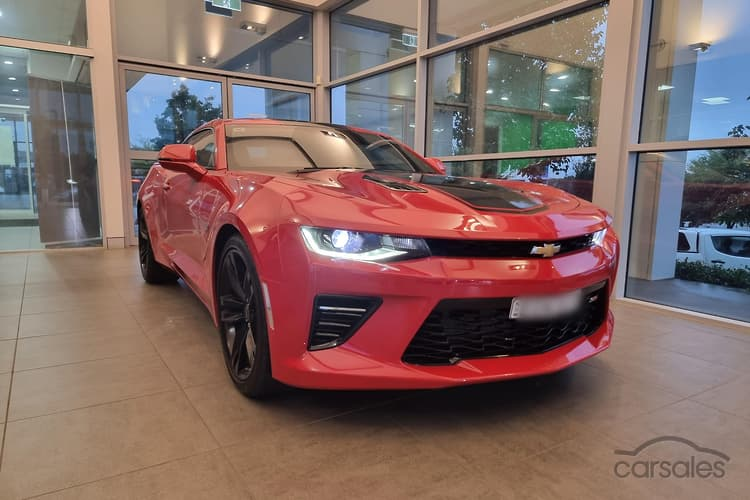

In [35]:
query_doc = Document(uri='/content/query.jpg')
query_doc.display()

In [36]:
def preproc(d: Document):
    return (d.load_uri_to_image_tensor()  # load
             .set_image_tensor_shape((80, 60))  # ensure all images right size (dataset image size _should_ be (80, 60))
             .set_image_tensor_normalization()  # normalize color 
             .set_image_tensor_channel_axis(-1, 0))  # switch color axis for the PyTorch model later

In [37]:
query_docs = DocumentArray([query_doc])

In [38]:
query_docs.apply(preproc)

╭─────────────────────── Documents Summary ───────────────────────╮
│                                                                 │
│   Length                 1                                      │
│   Homogenous Documents   True                                   │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri')   │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       1                False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   1                False             │
│   uri         ('str',)       1                False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [39]:
query_docs.embed(model, device=device)

╭───────────────────────────── Documents Summary ──────────────────────────────╮
│                                                                              │
│   Length                 1                                                   │
│   Homogenous Documents   True                                                │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    1                False             │
│   id          ('str',)       1                False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   1                False             │
│   uri         ('str',)       1                False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [40]:
query_docs.match(docs, limit=9)

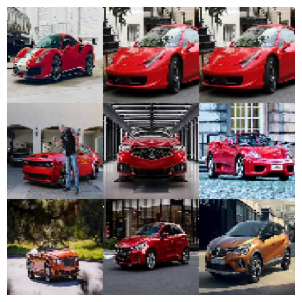

In [41]:
(DocumentArray(query_doc.matches, copy=True)
    .apply(lambda d: d.set_image_tensor_channel_axis(0, -1)
                      .set_image_tensor_inv_normalization())).plot_image_sprites()

In [ ]:
1